In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Membaca dataset , sep=';'
df_selected = pd.read_csv('bahan/final bahan/result data prep (01).csv')


In [11]:
# Mengganti nilai NaN dengan string kosong
df_selected = df_selected.copy()
df_selected['result_descriptions'] = df_selected['result_descriptions'].fillna('')

In [12]:
# 3. Pemecahan Data
# Mendefinisikan fitur dan label
X = df_selected['result_descriptions']
y = df_selected['subcategory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Ekstraksi Fitur
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [13]:
from sklearn.preprocessing import LabelEncoder

# Melakukan Label Encoding pada target
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [14]:
# 5. Pelatihan Model
model = MultinomialNB()
model.fit(X_train_vec, y_train_encoded)

MultinomialNB()

In [15]:
# Mencetak hasil prediksi
print("Predictions:", y_train_encoded)

Predictions: [ 8 12  1 ...  1 10  3]


Measure Evaluation

In [16]:
# 6. Evaluasi Model
y_train_encoded = model.predict(X_test_vec)
accuracy = accuracy_score(y_test_encoded, y_train_encoded)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test_encoded, y_train_encoded))

Accuracy: 79.49%
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.72      0.99      0.83       161
           2       0.00      0.00      0.00         2
           3       1.00      0.50      0.67        18
           4       0.88      0.55      0.68        40
           5       0.00      0.00      0.00         8
           6       1.00      0.95      0.98        21
           7       1.00      0.78      0.88         9
           8       1.00      0.42      0.59        19
           9       0.75      0.43      0.55         7
          10       0.74      0.76      0.75       104
          12       1.00      1.00      1.00         5
          13       1.00      0.78      0.88        18
          14       0.00      0.00      0.00         2
          15       0.97      0.97      0.97        40
          16       1.00      0.67      0.80         3
          19       1.00      0.44      0.

d:\Program Files\Python\python378\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Program Files\Python\python378\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Program Files\Python\python378\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


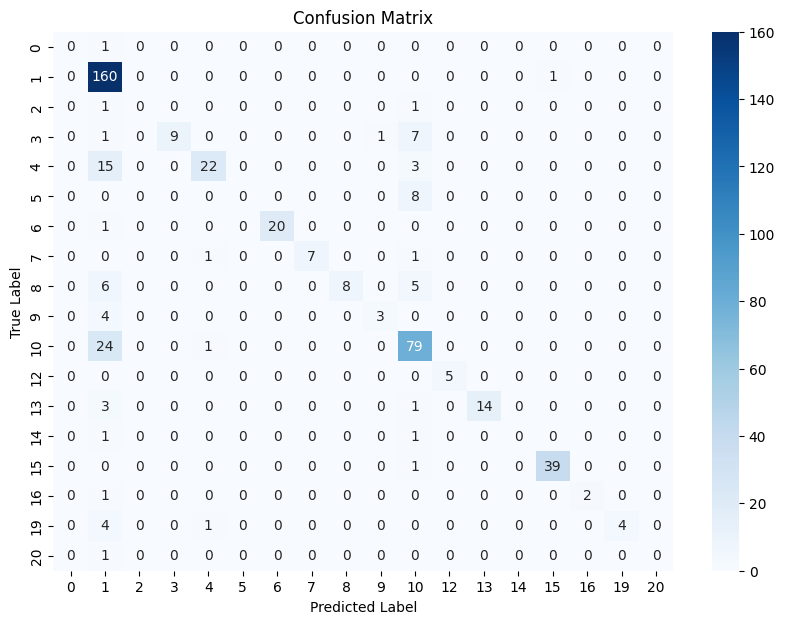

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
cm = confusion_matrix(y_test_encoded, y_train_encoded)

# Menentukan semua label yang ada
all_labels = np.unique(np.concatenate((y_test_encoded, y_train_encoded)))

# Membuat plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# MAE - Mean Absolute Error
mae = mean_absolute_error(y_test_encoded, y_train_encoded)

# MAPE - Mean Absolute Percentage Error (Perlu menangani nilai nol)
y_true_array = np.array(y_test_encoded)
y_pred_array = np.array(y_train_encoded)
mape = np.mean(np.abs((y_true_array - y_pred_array) / np.clip(y_true_array, 1e-10, None))) * 100

# MSE - Mean Squared Error
mse = mean_squared_error(y_test_encoded, y_train_encoded)

# RMSE - Root Mean Squared Error
rmse = np.sqrt(mse)

# R² - Coefficient of Determination
r2 = r2_score(y_test_encoded, y_train_encoded)

# Menampilkan hasil
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}%')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

MAE: 1.4594
MAPE: 2136752159.4466%
MSE: 13.7585
RMSE: 3.7093
R²: 0.4882
